In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.head())
print(test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Visualization

C:\Users\madur\AppData\Local\Temp\ipykernel_8764\2825979954.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'] , fit=norm);



 mu = 180921.20 and sigma = 79415.29



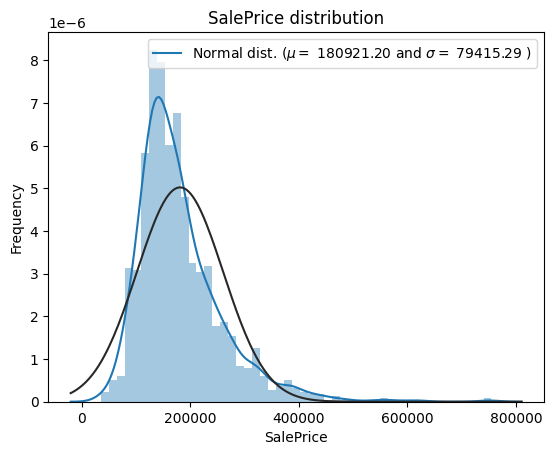

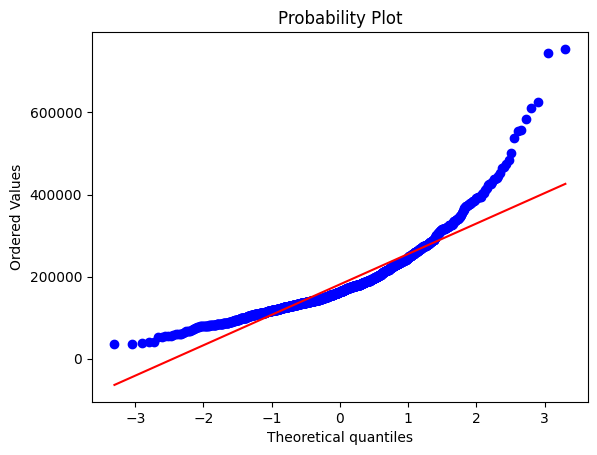

In [5]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show() 

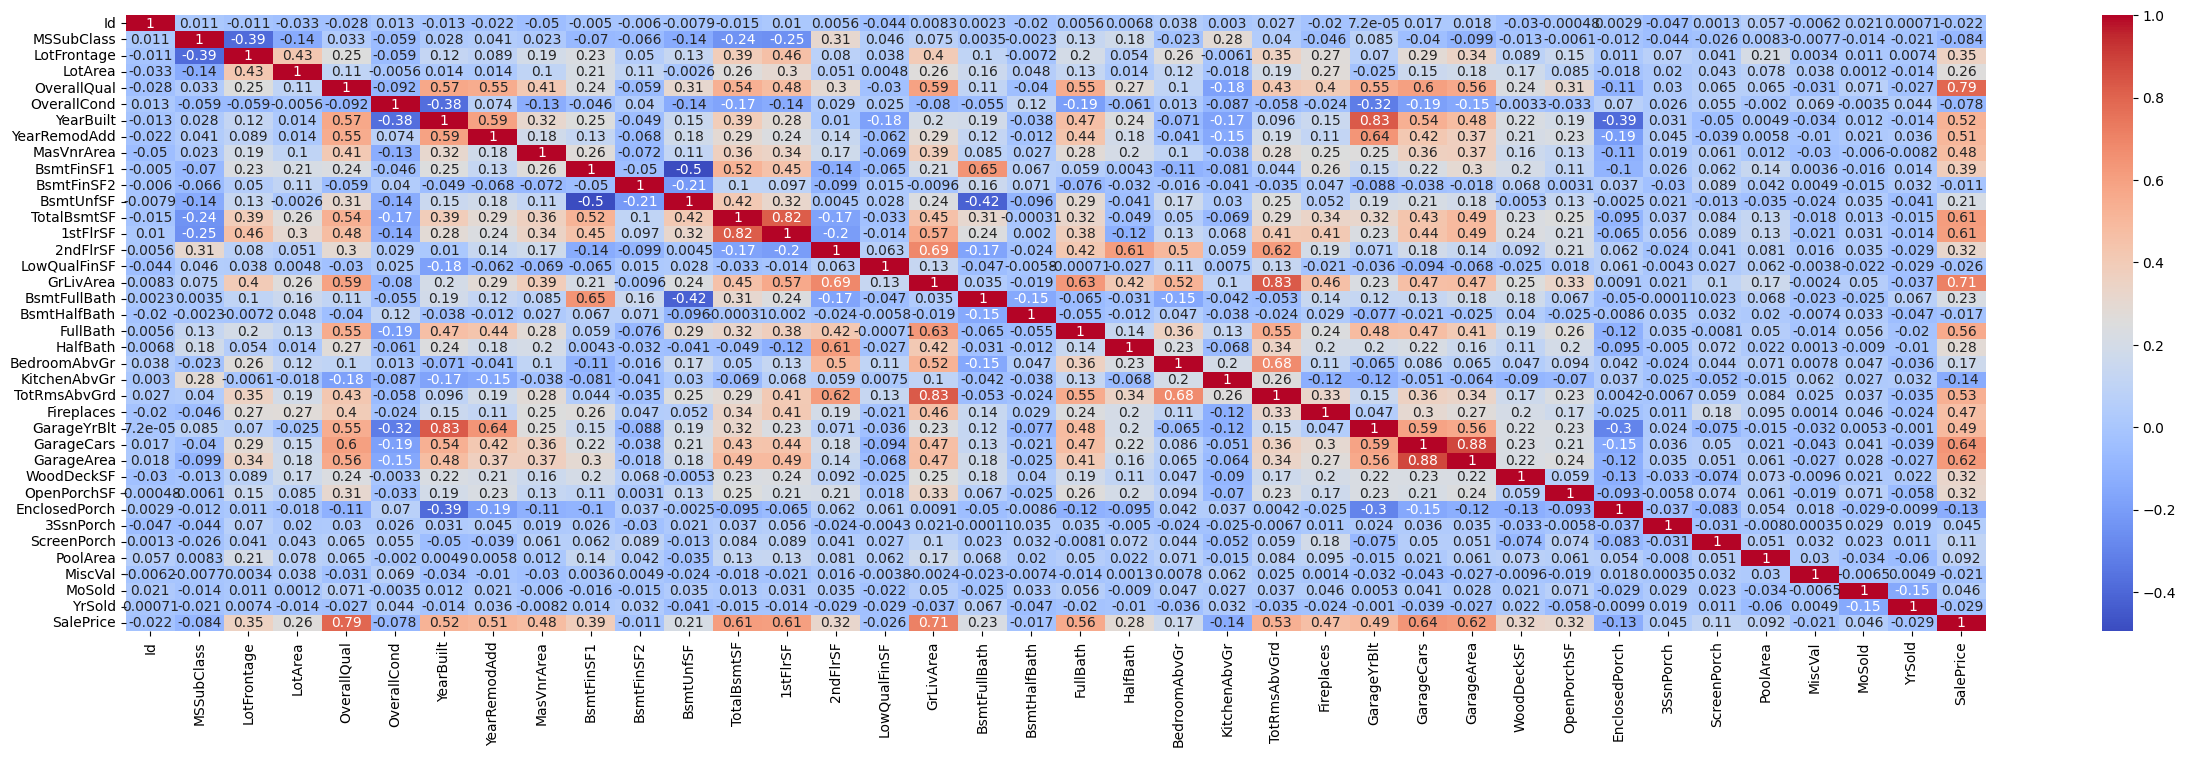

In [6]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

In [7]:
corr = train.corr()

In [8]:
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test=test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

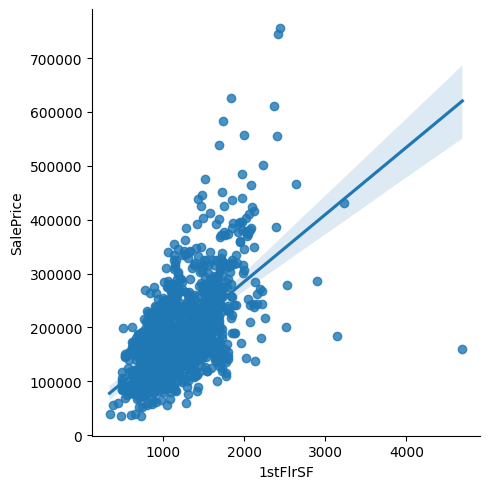

In [11]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train) # 1stFlrSF seems very corelated with SalePrice.

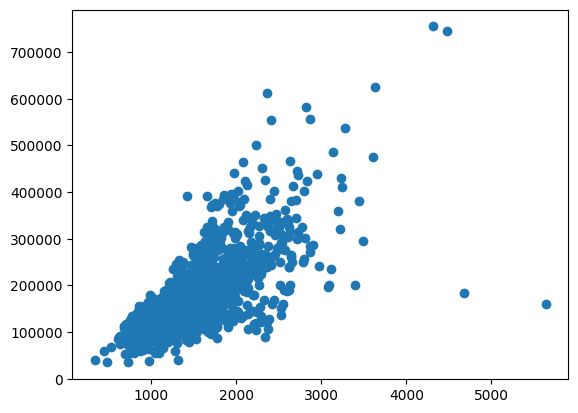

In [12]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = train)

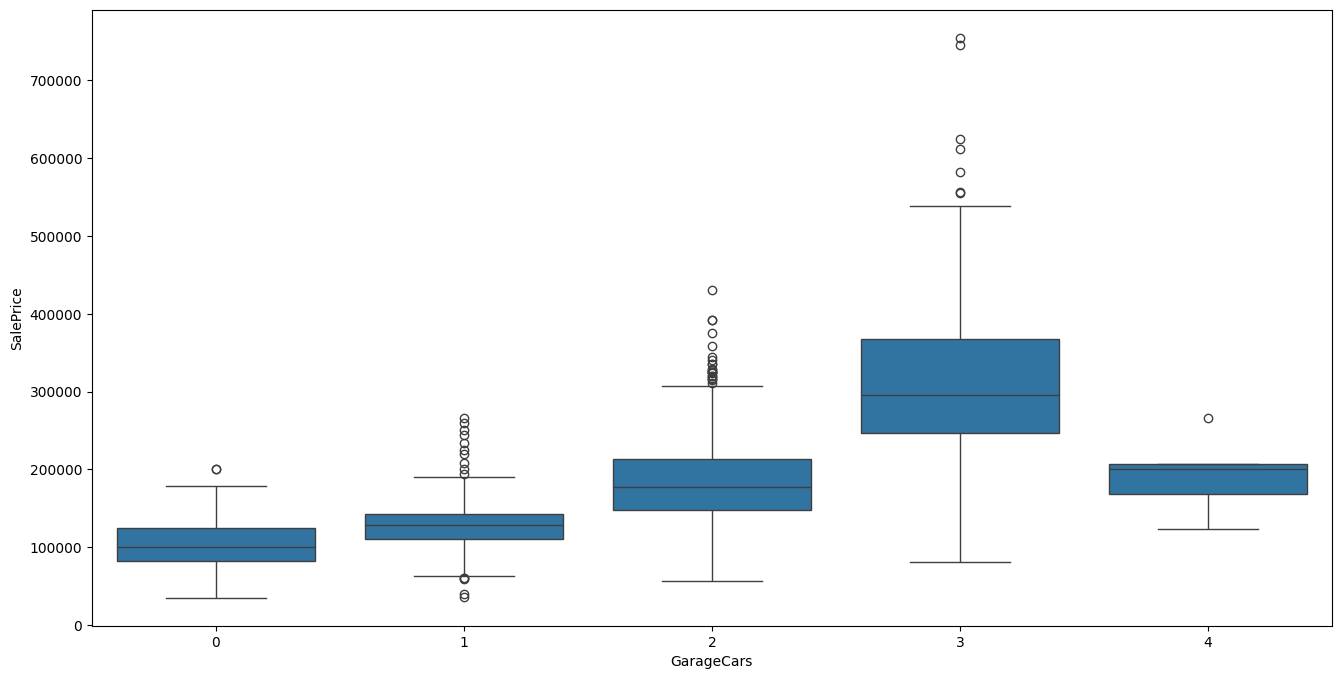

In [13]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

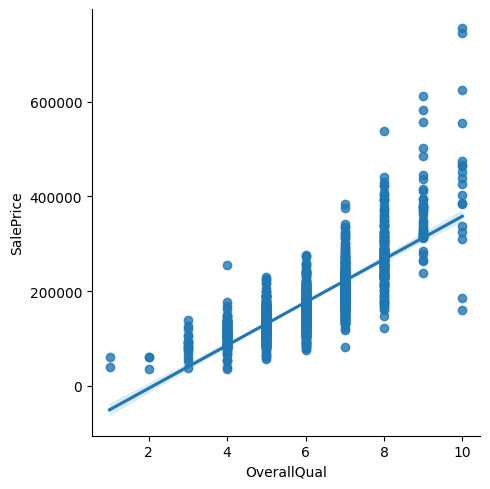

In [14]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

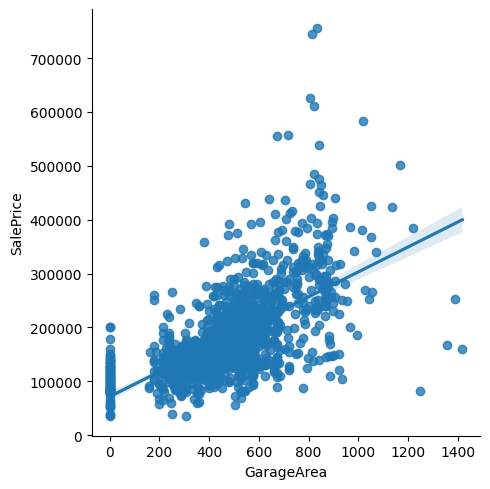

In [15]:
sns.lmplot(x='GarageArea',y='SalePrice',data=train)


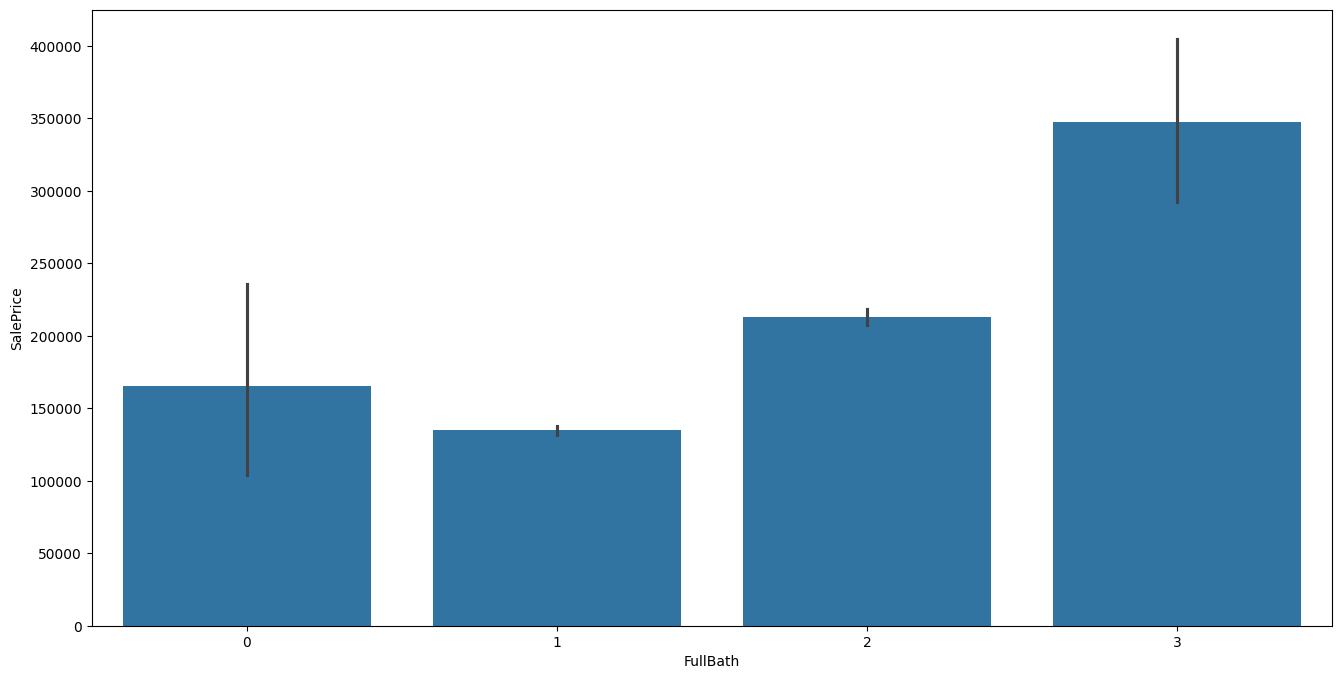

In [16]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)
plt.show()

In [17]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
FullBath,0,0.000000
OpenPorchSF,0,0.000000
WoodDeckSF,0,0.000000
GarageArea,0,0.000000
GarageCars,0,0.000000
Fireplaces,0,0.000000
TotRmsAbvGrd,0,0.000000


In [18]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

C:\Users\madur\AppData\Local\Temp\ipykernel_8764\3889376966.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)


In [19]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

In [20]:
#missing data
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
LotFrontage,227,0.155586
GarageYrBlt,78,0.053461
MasVnrArea,15,0.010281
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
TotRmsAbvGrd,0,0.000000
WoodDeckSF,0,0.000000
Fireplaces,0,0.000000


In [21]:
#dealing with missing data
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

C:\Users\madur\AppData\Local\Temp\ipykernel_8764\3364693776.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)


In [22]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64

In [23]:
train.isnull().sum().sort_values(ascending = False).head(20)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

In [24]:
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [25]:
categorical_cols

[]

In [26]:
# Categorical boolean mask
categorical_feature_mask_test = test.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [27]:
train.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
0,7,2003,2003,196.0,706,856,856,854,1710,2,8,0,2003.0,2,548,0,61,208500
1,6,1976,1976,0.0,978,1262,1262,0,1262,2,6,1,1976.0,2,460,298,0,181500
2,7,2001,2002,162.0,486,920,920,866,1786,2,6,1,2001.0,2,608,0,42,223500
3,7,1915,1970,0.0,216,756,961,756,1717,1,7,1,1998.0,3,642,0,35,140000
4,8,2000,2000,350.0,655,1145,1145,1053,2198,2,9,1,2000.0,3,836,192,84,250000


In [28]:
test.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF
0,5,1961,1961,0.0,468.0,882.0,896,0,896,1,5,0,1961.0,1.0,730.0,140,0
1,6,1958,1958,108.0,923.0,1329.0,1329,0,1329,1,6,0,1958.0,1.0,312.0,393,36
2,5,1997,1998,0.0,791.0,928.0,928,701,1629,2,6,1,1997.0,2.0,482.0,212,34
3,6,1998,1998,20.0,602.0,926.0,926,678,1604,2,7,1,1998.0,2.0,470.0,360,36
4,8,1992,1992,0.0,263.0,1280.0,1280,0,1280,2,5,0,1992.0,2.0,506.0,0,82


In [29]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
OverallQual      0
TotRmsAbvGrd     0
OpenPorchSF      0
WoodDeckSF       0
GarageArea       0
GarageCars       0
Fireplaces       0
FullBath         0
YearBuilt        0
GrLivArea        0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtFinSF1       0
YearRemodAdd     0
SalePrice        0
dtype: int64

In [30]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
OverallQual      0
TotRmsAbvGrd     0
WoodDeckSF       0
Fireplaces       0
GrLivArea        0
FullBath         0
YearBuilt        0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
OpenPorchSF      0
dtype: int64

In [31]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

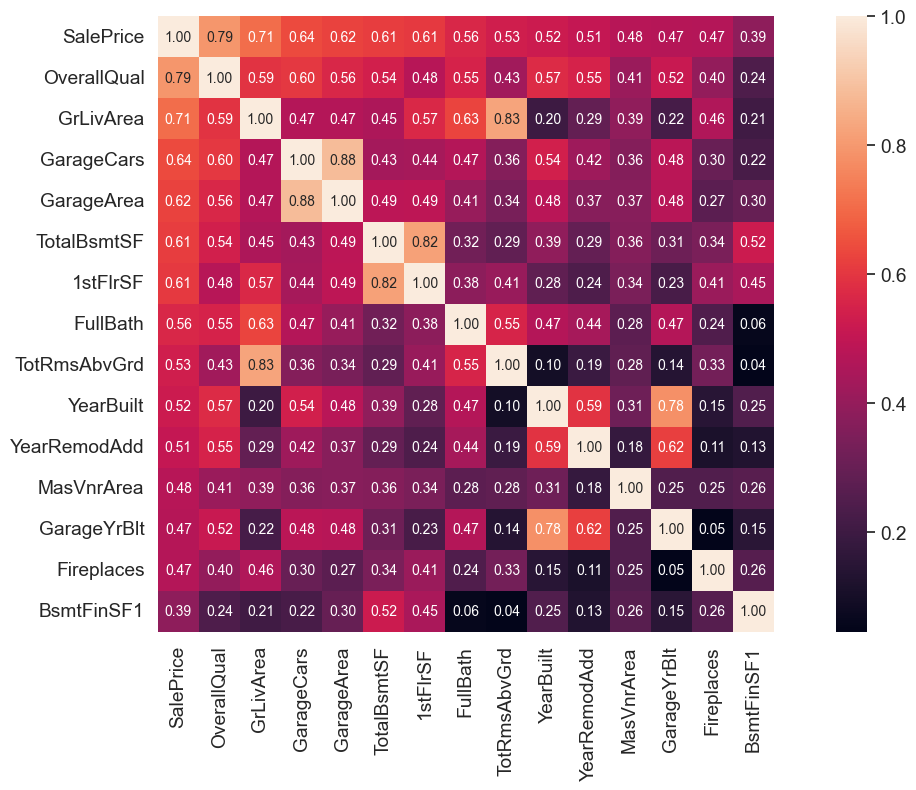

In [32]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [33]:
train = train[cols]

In [34]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [35]:
test=test[cols.drop('SalePrice')]

In [36]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
GarageCars       1
GarageArea       1
TotalBsmtSF      1
BsmtFinSF1       1
OverallQual      0
GrLivArea        0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
Fireplaces       0
dtype: int64

In [37]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0


In [38]:
train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,2003.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1998.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655


In [39]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)

In [41]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test) 

In [42]:
X_train

array([[ 1.37391375,  2.5236405 ,  0.31454703, ...,  0.46520725,
         0.58626866,  0.07421157],
       [-1.53923947, -0.2856721 ,  0.31454703, ..., -0.54640203,
        -0.97000815, -1.01837681],
       [ 0.64562544, -0.01580724,  0.31454703, ...,  1.2660646 ,
        -0.97000815, -1.01837681],
       ...,
       [-0.08266286,  0.08903234,  0.31454703, ...,  0.04370339,
         0.58626866, -0.83476756],
       [ 0.64562544,  0.03855402,  0.31454703, ...,  1.09746305,
         0.58626866,  1.86950201],
       [-0.81095116, -0.70308897, -1.02489906, ..., -0.84145473,
        -0.97000815,  1.58388762]])

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [44]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression()


In [45]:
# print the intercept
print(lm.intercept_)

[6.60022817e-17]


In [46]:
print(lm.coef_)

[[ 0.29434388  0.31107005  0.05109985  0.06398884  0.11932473  0.02209143
  -0.044909    0.0334707   0.07675313  0.09456834  0.05714788  0.01910605
   0.04584189  0.1392006 ]]


In [47]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

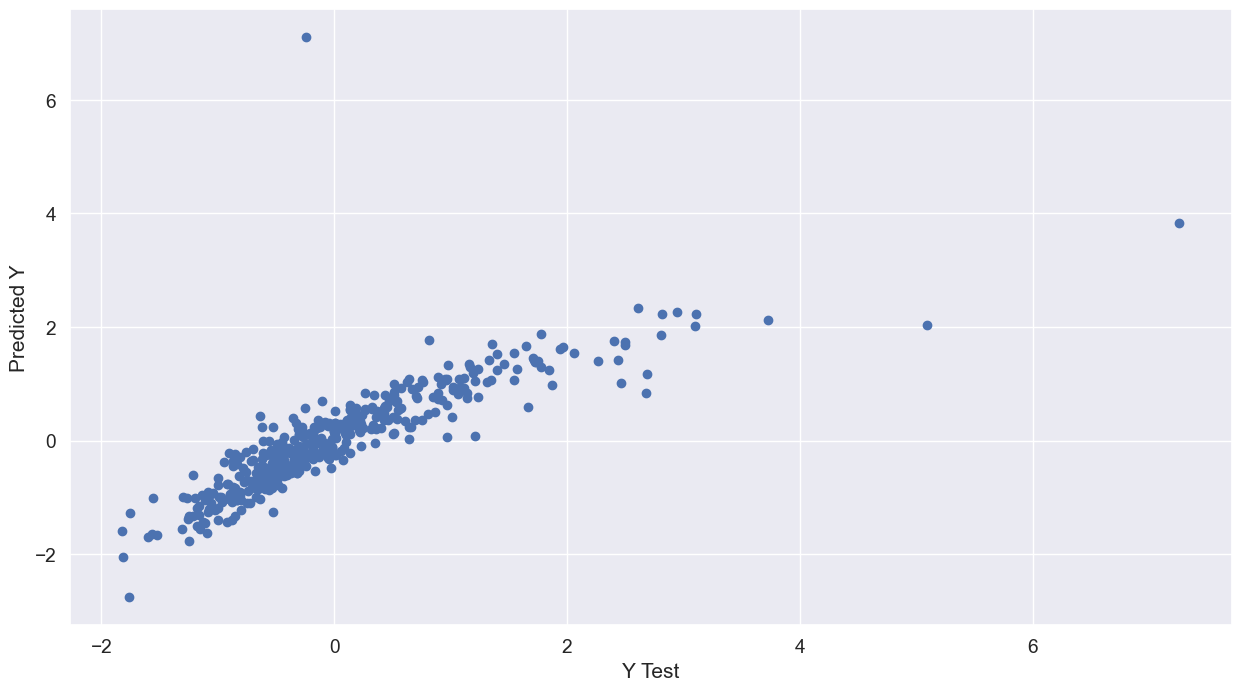

In [48]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

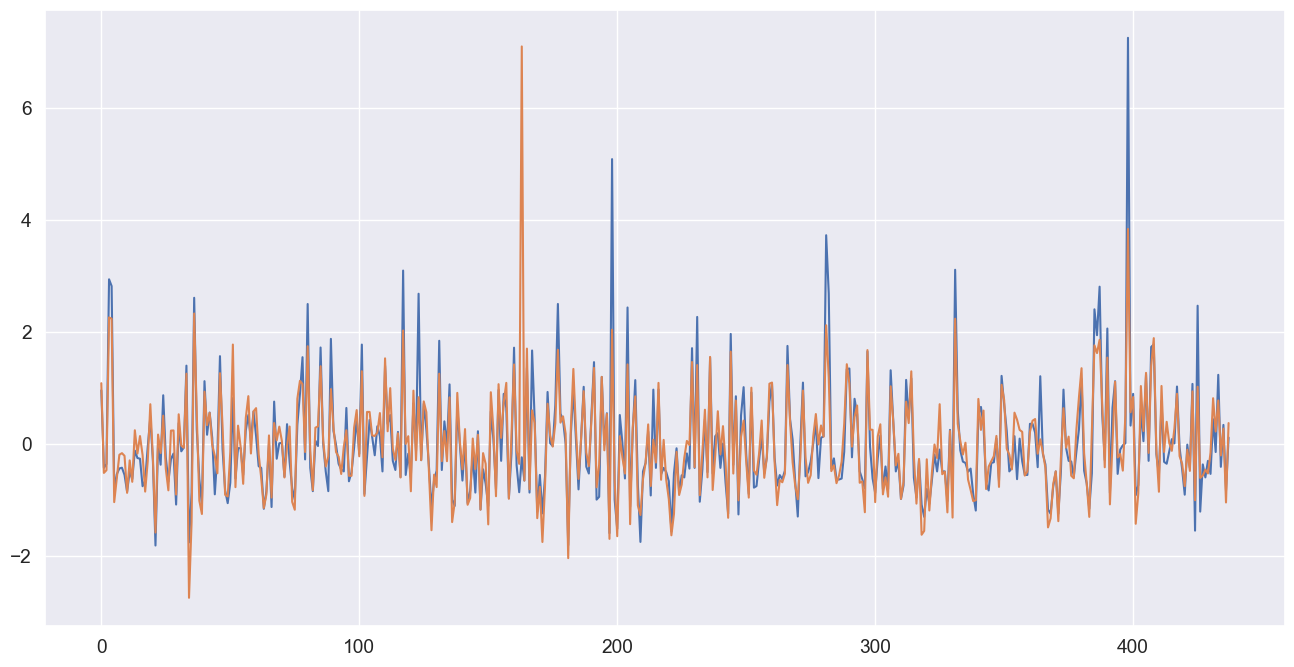

In [49]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()


In [50]:
from sklearn import metrics

In [53]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
r2_score = metrics.r2_score(y_test, predictions)
print('R2 Score:', r2_score)


MAE: 0.29105407971784336
MSE: 0.29995756024517595
RMSE: 0.5476838141164808
R2 Score: 0.700042439754824


In [56]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)


G:\Anaconda\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.05, max_depth=4)

In [58]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))
r2_score = metrics.r2_score(y_test, predictions)
print('R2 Score:', r2_score)


MAE: 0.2296698465413959
MSE: 0.11575864560198315
RMSE: 0.3402332223666336
R2 Score: 0.700042439754824


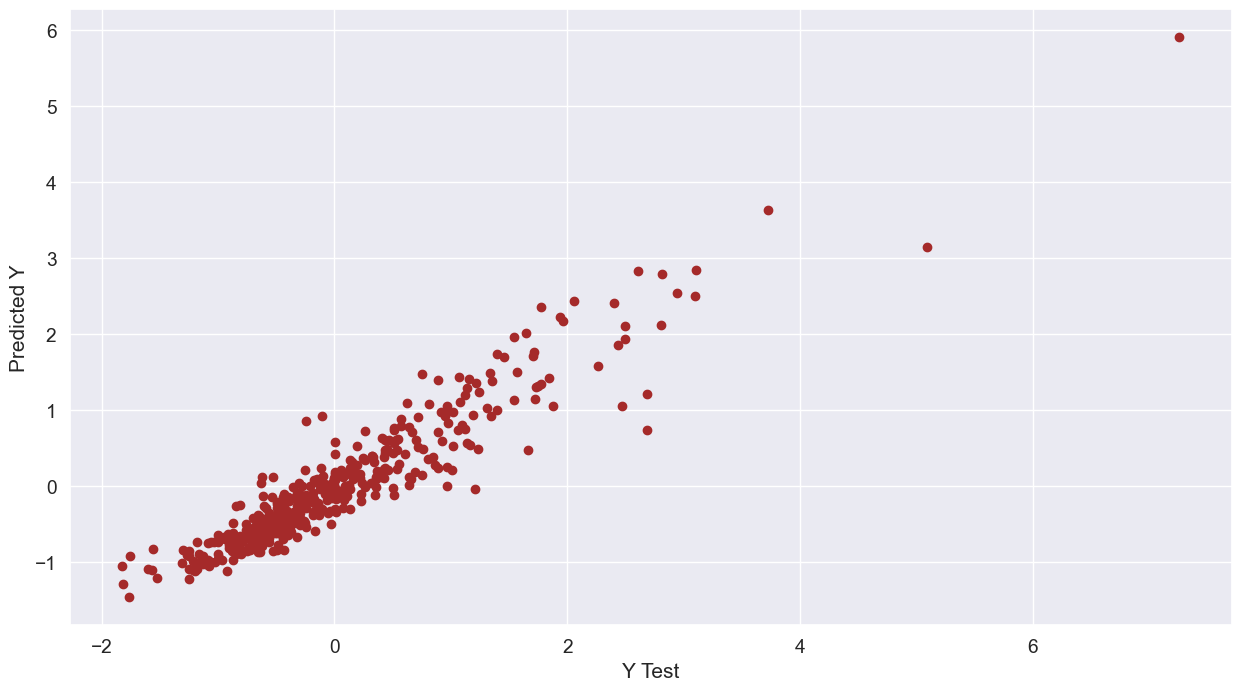

In [62]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

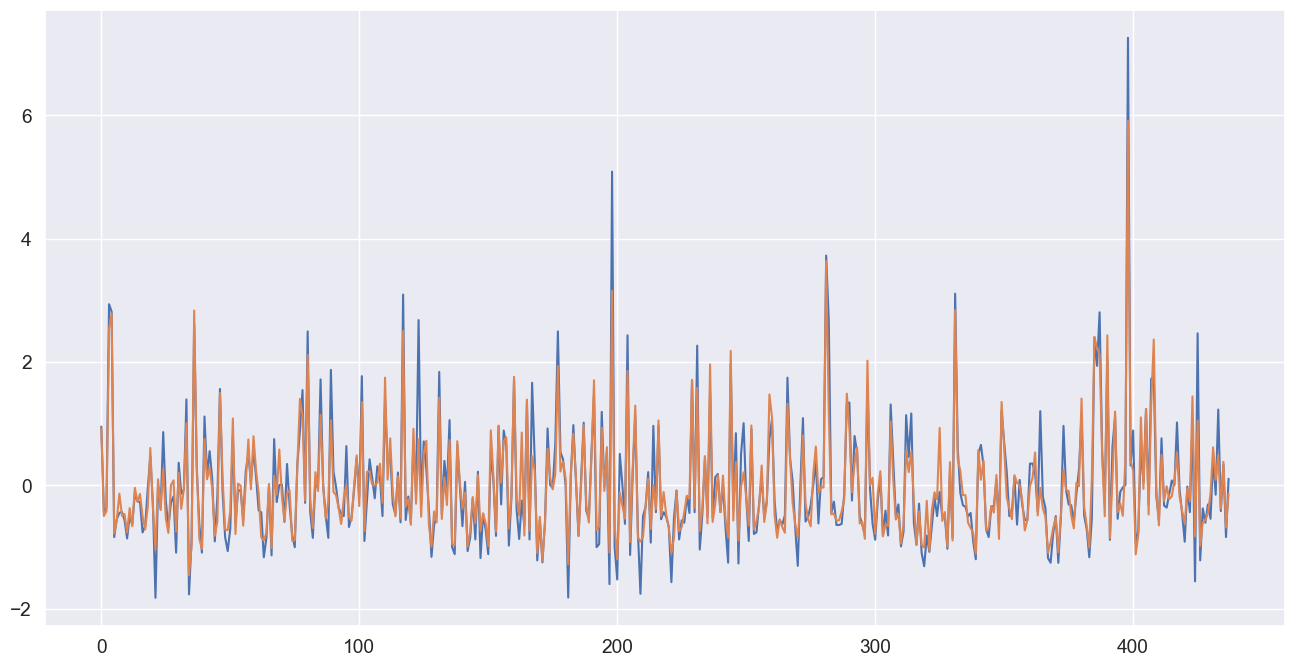

In [63]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(clf_pred, label = 'predict')
plt.show()

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)


DecisionTreeRegressor(random_state=100)

In [65]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))
r2_score = metrics.r2_score(y_test, predictions)
print('R2 Score:', r2_score)

MAE: 0.3327904077116327
MSE: 0.2297983841710415
RMSE: 0.4793729072142496
R2 Score: 0.700042439754824


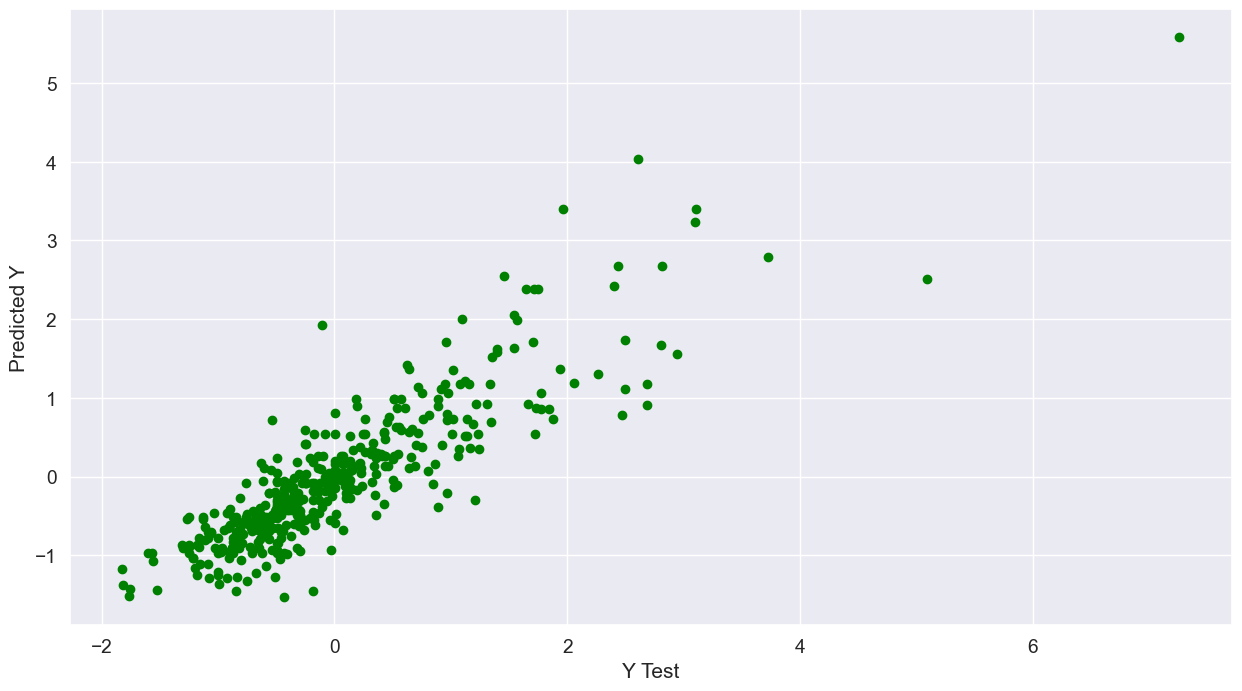

In [67]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [68]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)


G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [69]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
r2_score = metrics.r2_score(y_test, predictions)
print('R2 Score:', r2_score)


MAE: 0.2340167958999903
MSE: 0.18996478703494174
RMSE: 0.4358495004413126
R2 Score: 0.700042439754824


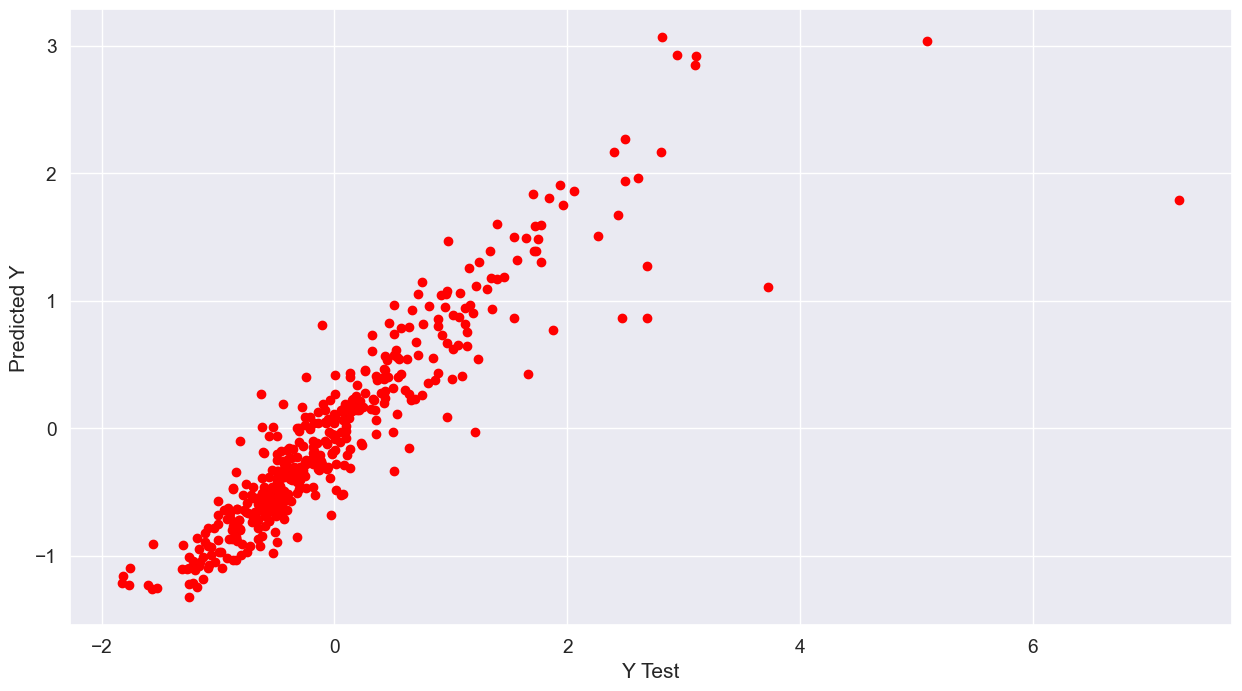

In [71]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

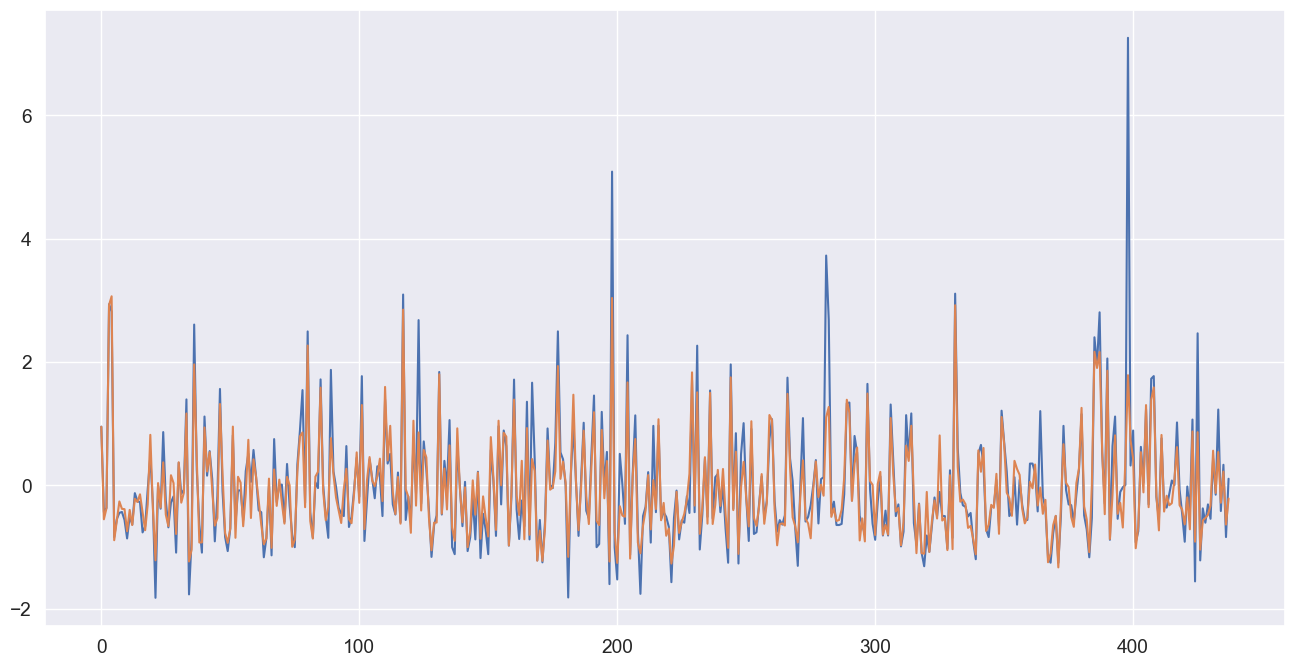

In [72]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(svr_pred, label = 'predict')
plt.show()

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)


C:\Users\madur\AppData\Local\Temp\ipykernel_8764\16451869.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [74]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [75]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))
r2_score = metrics.r2_score(y_test, predictions)
print('R2 Score:', r2_score)


MAE: 0.2370348998220862
MSE: 0.15307085264058032
RMSE: 0.3912427029870082
R2 Score: 0.700042439754824


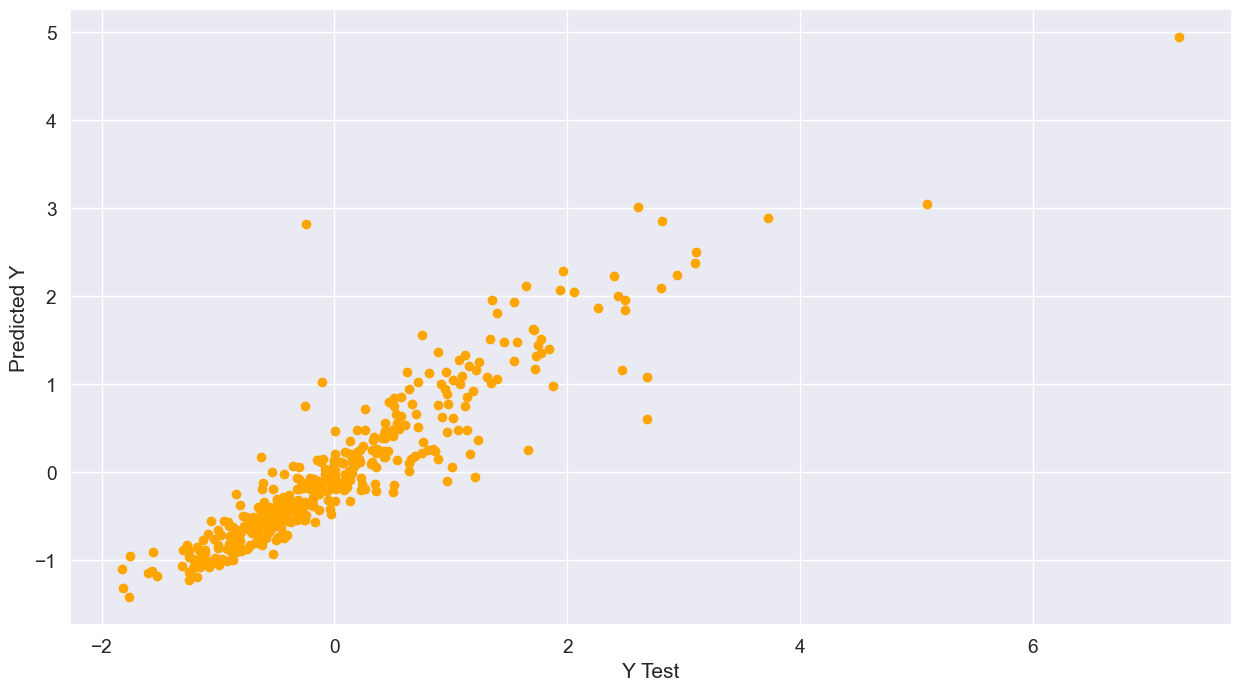

In [76]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

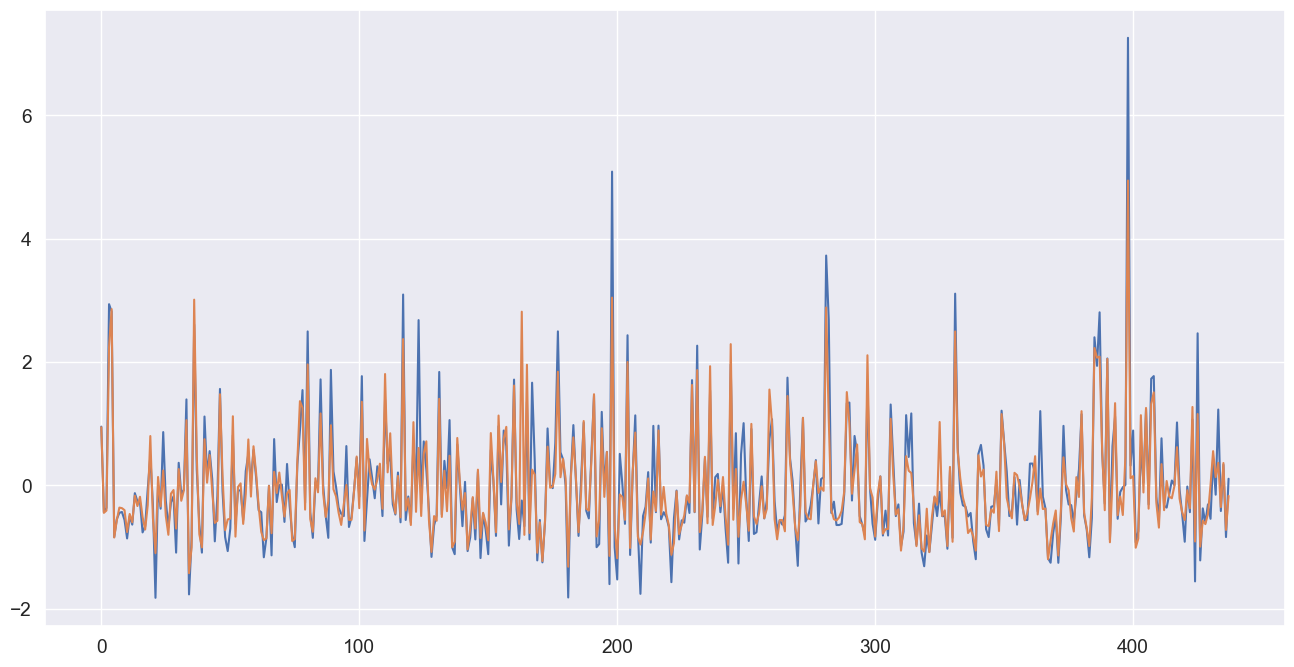

In [77]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(rfr_pred, label = 'predict')
plt.show()

In [78]:
import lightgbm as lgb

In [79]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [80]:
model_lgb.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

G:\Anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9, max_bin=55,
              min_data_in_leaf=6, min_sum_hessian_in_leaf=11, n_estimators=500,
              num_leaves=5, objective='regression')

In [81]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [82]:
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))
r2_score = metrics.r2_score(y_test, predictions)
print('R2 Score:', r2_score)

MAE: 0.25506597810722104
MSE: 0.16677803376028932
RMSE: 0.4083846639631431
R2 Score: 0.700042439754824


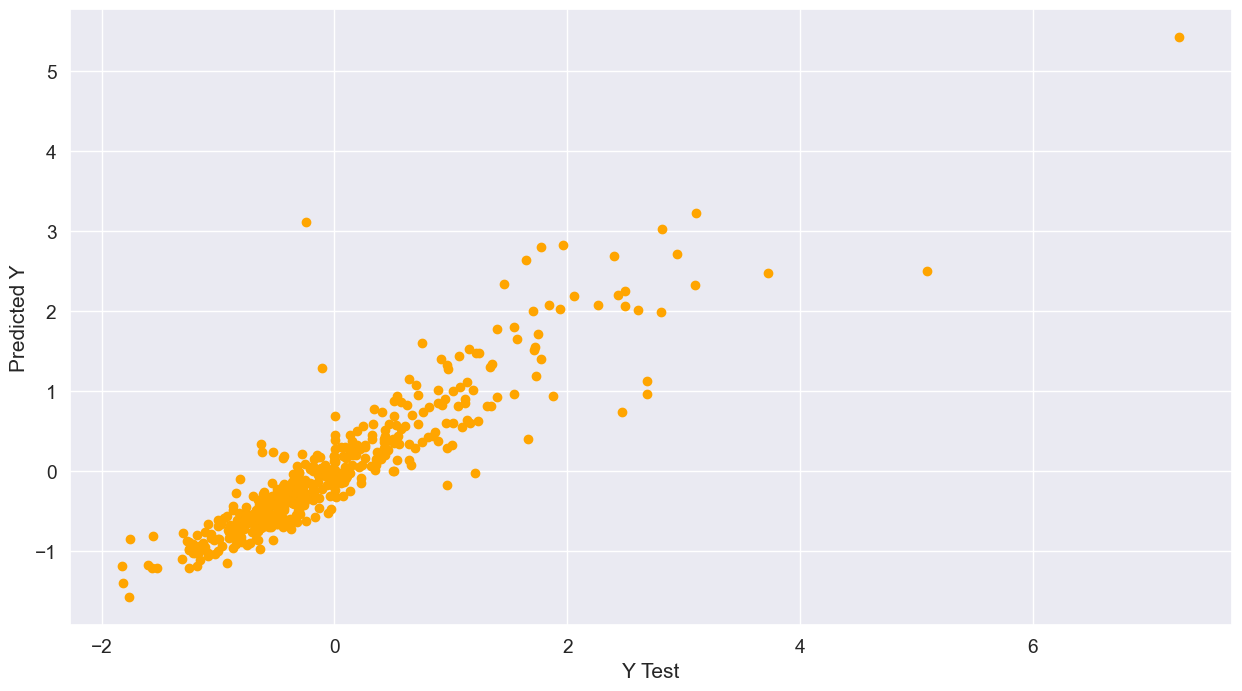

In [83]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lgb_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

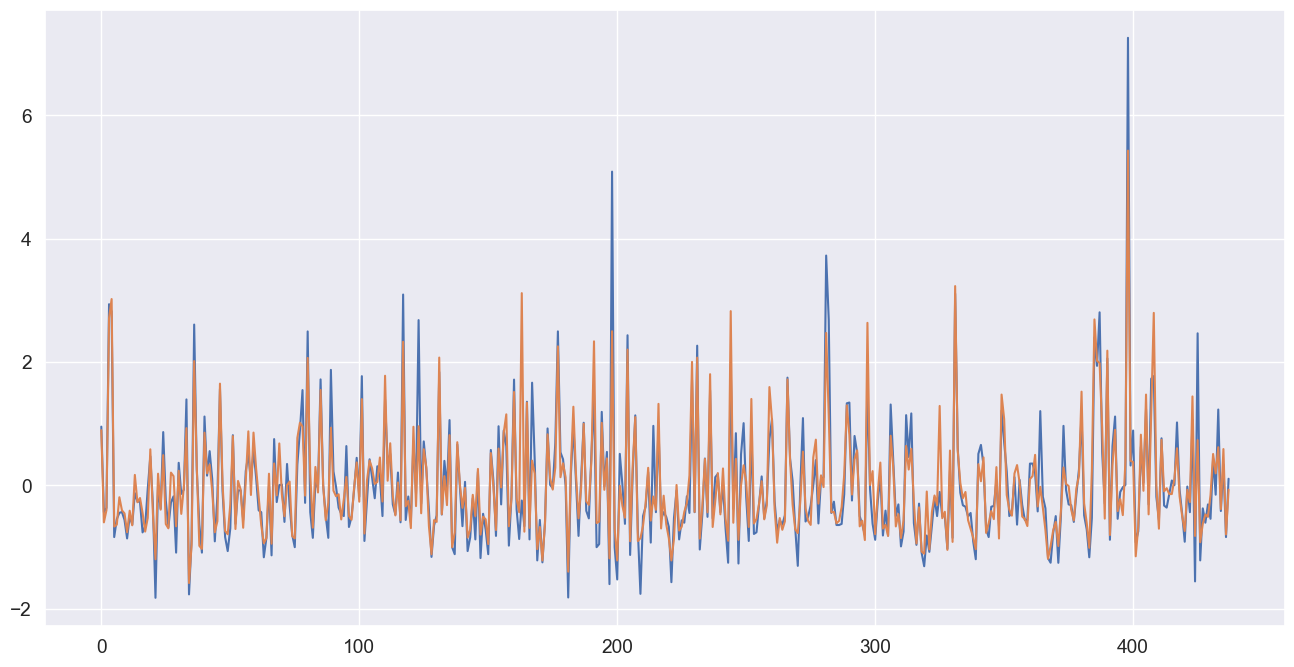

In [84]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(lgb_pred, label = 'predict')
plt.show()

In [85]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

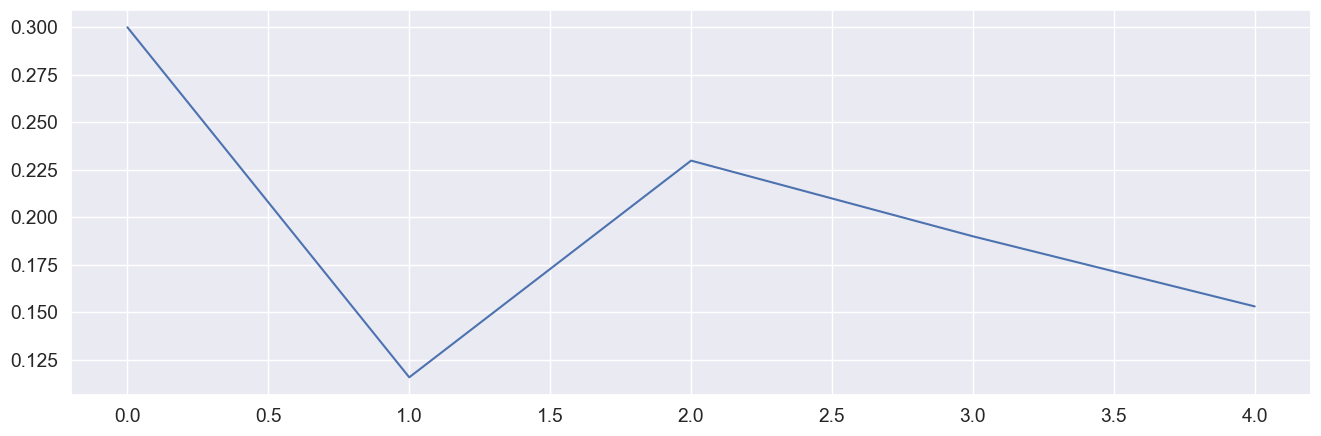

In [86]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

In [87]:
a = pd.read_csv('test.csv')

In [88]:
test_id = a['Id']
a = pd.DataFrame(test_id, columns=['Id'])

In [89]:
test = sc_X.fit_transform(test)

In [90]:
test

array([[-0.75110125, -1.21558782, -0.98801273, ..., -0.65048832,
        -0.89805519,  0.0632947 ],
       [-0.05487716, -0.32353941, -0.98801273, ..., -0.76719424,
        -0.89805519,  1.06339164],
       [-0.75110125,  0.29450799,  0.30162251, ...,  0.74998273,
         0.64706571,  0.77325363],
       ...,
       [-0.75110125, -0.539856  ,  0.30162251, ..., -0.6893903 ,
         0.64706571,  1.72499424],
       [-0.75110125, -1.06313613, -2.27764797, ...,  0.        ,
        -0.89805519, -0.2246453 ],
       [ 0.64134693,  1.0588266 ,  1.59125775, ...,  0.59437483,
         0.64706571,  0.70071913]])

In [91]:
test_prediction_lgbm=model_lgb.predict(test)
test_prediction_lgbm= test_prediction_lgbm.reshape(-1,1)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [92]:
test_prediction_lgbm

array([[-0.78269669],
       [-0.36479555],
       [-0.02265629],
       ...,
       [-0.04654838],
       [-0.7710944 ],
       [ 0.923539  ]])

In [93]:
test_prediction_lgbm =sc_y.inverse_transform(test_prediction_lgbm)

In [94]:
test_prediction_lgbm = pd.DataFrame(test_prediction_lgbm, columns=['SalePrice'])

In [95]:
test_prediction_lgbm.head()

,SalePrice
0,117227.991920
1,150378.992919
2,177520.003343
3,181965.769410
4,193483.994479


In [96]:
result = pd.concat([a,test_prediction_lgbm], axis=1)

In [97]:
result.head()

,Id,SalePrice
0,1461,117227.991920
1,1462,150378.992919
2,1463,177520.003343
3,1464,181965.769410
4,1465,193483.994479


In [98]:
result.to_csv('submission.csv',index=False)

In [99]:
# Using Decision Tree Regressor
test_prediction_dt = dtreg.predict(test)
test_prediction_dt = test_prediction_dt.reshape(-1, 1)

test_prediction_dt = sc_y.inverse_transform(test_prediction_dt)

test_prediction_dt = pd.DataFrame(test_prediction_dt, columns=['SalePrice'])

result_dt = pd.concat([a, test_prediction_dt], axis=1)

result_dt.to_csv('submission_dt.csv', index=False)


In [100]:
# Using Gradient Boosting Regressor
test_prediction_gb = clf.predict(test)
test_prediction_gb = test_prediction_gb.reshape(-1, 1)

test_prediction_gb = sc_y.inverse_transform(test_prediction_gb)

test_prediction_gb = pd.DataFrame(test_prediction_gb, columns=['SalePrice'])

result_gb = pd.concat([a, test_prediction_gb], axis=1)

result_gb.to_csv('submission_gb.csv', index=False)


In [101]:
# Using Support Vector Regressor
test_prediction_svr = svr.predict(test)
test_prediction_svr = test_prediction_svr.reshape(-1, 1)

test_prediction_svr = sc_y.inverse_transform(test_prediction_svr)

test_prediction_svr = pd.DataFrame(test_prediction_svr, columns=['SalePrice'])

result_svr = pd.concat([a, test_prediction_svr], axis=1)

result_svr.to_csv('submission_svr.csv', index=False)


In [102]:
# Using Random Forest Regressor
test_prediction_rf = rfr.predict(test)
test_prediction_rf = test_prediction_rf.reshape(-1, 1)

test_prediction_rf = sc_y.inverse_transform(test_prediction_rf)

test_prediction_rf = pd.DataFrame(test_prediction_rf, columns=['SalePrice'])

result_rf = pd.concat([a, test_prediction_rf], axis=1)

result_rf.to_csv('submission_rf.csv', index=False)


In [103]:
import pickle

# Pickle the models
with open('house_price.pkl', 'wb') as f:
    pickle.dump((lm, clf, dtreg, svr, rfr, model_lgb), f)

# Pickle the scalers
with open('house_price_prediction.pkl', 'wb') as f:
    pickle.dump((sc_X, sc_y), f)

print("Models and scalers pickled successfully!")

Models and scalers pickled successfully!


In [104]:
train

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,2003.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1998.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,460,953,953,2,7,1999,2000,0.0,1999.0,1,0
1456,210000,6,2073,2,500,1542,2073,2,7,1978,1988,119.0,1978.0,2,790
1457,266500,7,2340,1,252,1152,1188,2,9,1941,2006,0.0,1941.0,2,275
1458,142125,5,1078,1,240,1078,1078,1,5,1950,1996,0.0,1950.0,0,49


In [381]:
import pickle

# Save the LGBMRegressor model and the scalers to a pickle file
with open('house_price_prediction.pkl', 'wb') as f:
    pickle.dump((model_lgb), f)

print("LGBM model and scalers pickled successfully!")


LGBM model and scalers pickled successfully!
